In [3]:
import pandas as pd
import numpy as np
import itertools

Ambil 3 besar dari kumulatif

In [4]:
GECH4RI = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GECH4RI_rice_category_annual_gtco2eq.xlsx")
GECO2AB_CH4 = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_CH4_crop_category_annual_gtco2eq_13Jan_25.xlsx")
GECO2AB_N2O = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_N2O_crop_category_annual_gtco2eq_13Jan_25.xlsx")
GEC2OLC = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GEN2OLC_crop_category_annual_gtco2eq.xlsx")
GEN2ORE = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GEN2ORE_crop_category_annual_gtco2eq_13Jan.xlsx")
GFERTYN = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GFERTSYN_crop_category_annual_gtco2eq.xlsx")
GMANURE = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GMANURE_crop_category_annual_gtco2eq.xlsx")
LUC_agri = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/LUC_agri_crop_category_annual_gtco2eq.xlsx")
agri_to_agri = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri2agri_crop_category_annual_gtco2eq.xlsx")
peat_CH4 = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_CH4_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_CO2 = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_CO2_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_DOC = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_DOC_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_N2O = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_N2O_crop_category_annual_gtco2eq_v2_13Jan.xlsx")

In [5]:
LUC_combined = pd.concat([LUC_agri, agri_to_agri, GEC2OLC ], ignore_index=True)
LUC_groupby = LUC_combined.groupby(['IMAGE Region Name', 'type']).sum() #mean
df_LUC = LUC_groupby.reset_index()
df_LUC = df_LUC.drop(columns=['emissions'])
df_LUC.loc[:, range(1975, 2025, 5)] = (df_LUC[range(1975, 2025, 5)].values * 5)
df_LUC_melt = df_LUC.melt(id_vars=['IMAGE Region Name', 'type'], var_name='time', value_name='value')
df_LUC_melt_droptime = df_LUC_melt.drop(columns=['time'])
df_LUC_groupby = df_LUC_melt_droptime.groupby(['IMAGE Region Name', 'type']).sum()
df_LUC_index = df_LUC_groupby.reset_index()
df_LUC_index.loc[:, 'emissions'] = "LUC"

In [7]:
data_2kategori_sum_index['IMAGE Map'] = data_2kategori_sum_index['IMAGE Region Name']

In [10]:
df = data_2kategori_sum_index
def get_top_n(df, category_col, value_col, n):
    return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)
df_top3 = get_top_n(df, 'type', 'value', 2)

region_code_map = country_code.set_index('IMAGE Region Name')['IMAGE Region Code'].to_dict()
df_top3['IMAGE Map'] = df_top3['IMAGE Map'].map(region_code_map)
df_top3 = df_top3[df_top3['type'] != 'pasture']
df_top3 = df_top3.drop(columns=['IMAGE Region Name'])

columns2 = ['plant based fibres', 'non food, luxury, spices', 'vegetables & fruits', 'palm oil',
            'sugar crops', 'tropical roots & tubers', 'temperate roots & tubers', 'tropical oil crops',
            'temperate oil crops', 'soybeans', 'pulses', 'temperate cereals', 'tropical cereals', 'maize', 'rice',
            'wheat', 'pasture']

colors2 = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', 
           '#FFC55A', '#8E3E63', '#D2649A', '#03AED2', 
           '#68D2E8', '#5F6F52', '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
           '#F7C566', '#ACE1AF']

color_mapping = dict(zip(columns2, colors2))
def get_color(plant_type):
    return color_mapping.get(plant_type, 'unknown')  # Default to 'unknown' if not found

df_top3['color'] = df_top3['type'].apply(get_color)
df_pallete = df_top3.copy()
len(df_pallete)

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/2794837635.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


34

,type,value,IMAGE Map,IMAGE Classification Region,color
0,grass,25.295705,BRA,brazil-grass,unknown
1,grass,13.219849,CHN,china region-grass,unknown
2,maize,3.715445,BRA,brazil-maize,#FFF455
3,maize,2.191144,USA,usa-maize,#FFF455
4,oil & palm fruit,4.263931,INDO,indonesia region-oil & palm fruit,unknown
5,oil & palm fruit,1.543676,SEAS,southeast asia-oil & palm fruit,unknown
6,other non-food & luxury & spices,4.471058,INDO,indonesia region-other non-food & luxury & spices,unknown
7,other non-food & luxury & spices,1.966442,SEAS,southeast asia-other non-food & luxury & spices,unknown
8,other temperate cereals,0.666188,RUS,russia region-other temperate cereals,unknown
9,other temperate cereals,0.576709,WEU,western europe-other temperate cereals,unknown


Pre-processing data

In [13]:
import pandas as pd
import numpy as np
import itertools

carbon_footprint = pd.read_excel("X:/cadlan/stream_2/Step6/CF_clean_sesuai_v2.xlsx") #level origin
country_code = pd.read_excel("Z:/achaidir/Country Grids/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")
areaharvested = pd.read_excel("X:/cadlan/stream_2/Step4/REV_fao_stat_area_harvested_mov_average_REGION.xlsx")
production = pd.read_excel("X:/cadlan/stream_2/Step4/REV_fao_stat_production_mov_average_v2_REGION.xlsx")
areaharvested = areaharvested.rename(columns={"FAO Production": "Fao Area Harvested"})

Yield (sumbu Y)

In [14]:
# yield_raw (ton/ ha)

yield_raw = production.copy()
for region, time, ngfbfc in zip(yield_raw["IMAGE Region Name"].to_list(), yield_raw["time"].to_list(), yield_raw["NGFBFC"].to_list()):
    try:
        data1 = areaharvested[(areaharvested['IMAGE Region Name'] == region) & (areaharvested['time'] == time) & (areaharvested['NGFBFC'] == ngfbfc)]['Fao Area Harvested'].to_numpy()
        data2 = production[(production['IMAGE Region Name'] == region) & (production['time'] == time) & (production['NGFBFC'] == ngfbfc)]['FAO Production'].to_numpy()
        if data1.size == 0:
            data1 = [0]
        if data2.size == 0: 
            data2 = [0]
        mask = yield_raw[(yield_raw['IMAGE Region Name'] == region) & (yield_raw['time'] == time) & (yield_raw['NGFBFC'] == ngfbfc)].index
        yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]

    except (KeyError, ZeroDivisionError) as e:
        print(f"Error: {e} for region {region}")

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/1851541159.py:13: RuntimeWarning: invalid value encountered in double_scalars
  yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/1851541159.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/1851541159.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/1851541159.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/1851541159.py:13: RuntimeWarning: invalid value encountered in double_scalars
  yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/1851541159.py:13: Runtime

In [15]:
yield_raw_1 = yield_raw.copy()
yield_raw_1 = yield_raw_1.drop(columns=['FAO Production'])
yield_raw_1 = yield_raw_1[yield_raw_1['time'] != 1970]
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.lower()
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("tropical roots and tubers", "tropical roots & tubers")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("vegetables or fruits", "vegetables & fruits")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("other temperate cereals", "temperate cereals")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("temperate roots and tubers", "temperate roots & tubers")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("plant-based fibers", "plant based fibres")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("oil & palm fruit", "palm oil")

In [16]:
yield_raw_1['IMAGE Region Name'] = yield_raw_1['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
yield_raw_1['IMAGE Region Name'] = yield_raw_1['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
yield_raw_1['IMAGE Region Name'] = yield_raw_1['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
yield_raw_1['IMAGE Region Name'] = yield_raw_1['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
yield_raw_1['IMAGE Region Name'] = yield_raw_1['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
yield_raw_1['IMAGE Region Name'] = yield_raw_1['IMAGE Region Name'].str.lower()

In [17]:
yield_raw_copy = yield_raw_1.copy()
yield_raw_copy['IMAGE Classification Region'] = yield_raw_copy['IMAGE Region Name'] + "-" + yield_raw_copy['NGFBFC']
yield_raw_copy.rename(columns={'time': 'Year'}, inplace=True)
yield_raw_copy = yield_raw_copy.drop(columns=['IMAGE Region Name', 'NGFBFC'])
yield_raw_copy['value'] = yield_raw_copy['value'].fillna(0.0)
yield_FAO = yield_raw_copy[['Year', 'IMAGE Classification Region', 'value']]
yield_FAO  = yield_FAO[yield_FAO['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]

In [18]:
def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0

yield_FAO_average = yield_FAO.groupby(['IMAGE Classification Region'])['value'].apply(custom_mean).to_frame('value')
yield_FAO_average = yield_FAO_average.reset_index()
yield_FAO_average = yield_FAO_average[['IMAGE Classification Region', 'value']]
df2_array_selected = yield_FAO_average['value'].to_numpy()

Crop Footprint (sumbu X)

In [19]:
carbon_footprint.rename(columns={'NGFBFC': 'type'}, inplace=True)
columns = [x for x in range(1975, 2021, 5)]
carbon_footprint['type'] = carbon_footprint['type'].str.replace("non food, luxury, spices", "other non-food & luxury & spices").replace("oil, palm fruit", "palm oil")
carbon_footprint = carbon_footprint[~carbon_footprint['type'].str.contains("pasture")]
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()
carbon_footprint['IMAGE Classification Region'] = carbon_footprint['IMAGE Region Name'] + "-" + carbon_footprint['type']
carbon_footprint_group = carbon_footprint.groupby(["IMAGE Classification Region"]).sum()
carbon_footprint_group = carbon_footprint_group.reset_index()
carbon_footprint_group.rename(columns={'Mean': 'average'}, inplace=True)

In [20]:
carbon_footprint_group['average'] = carbon_footprint_group['average'].fillna(0)
carbon_footprint_group = carbon_footprint_group[['IMAGE Classification Region', 'average']]
carbon_footprint_array = carbon_footprint_group['average'].to_numpy()
carbon_footprint_group_sorted = carbon_footprint_group.sort_values(by='average', ascending=False)
carbon_footprint_  = carbon_footprint_group[carbon_footprint_group['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
carbon_footprint_array_selected = carbon_footprint_['average'].to_numpy()
carbon_footprint_ = pd.merge(left=carbon_footprint_, right=df_pallete, left_on="IMAGE Classification Region", right_on="IMAGE Classification Region", how="left")

In [21]:
years = [x for x in range(1975, 2021, 5)]
crops = [x for x in carbon_footprint_group['IMAGE Classification Region'].unique()]
combinations = list(itertools.product(years, crops))
df_new = pd.DataFrame(combinations, columns=['Year', 'IMAGE Classification Region'])
df_new["value"] = 0.0
df_new_copy2 = df_new.copy()
df_new_copy2 = df_new_copy2.merge(yield_FAO, how='left', left_on=['Year', 'IMAGE Classification Region'], right_on=['Year', 'IMAGE Classification Region'])
df_new_copy2['value'] = df_new_copy2['value_y'].fillna(0.0)
df_new_copy2 = df_new_copy2.drop(columns=['value_y', 'value_x'])
df_new_copy2 = pd.pivot_table(data=df_new_copy2, columns="Year", index=["IMAGE Classification Region"], values="value").reset_index()
df_new_copy2['average'] = df_new_copy2.iloc[:, 1:].mean(axis=1)
df_new_copy2['average'] = df_new_copy2['average'].fillna(0)
df_new_copy2 = df_new_copy2[['IMAGE Classification Region', 'average']]
df_2_sort = df_new_copy2.sort_values(by='average', ascending=False)
df2_array = df_new_copy2['average'].to_numpy()
df2_isin = df_new_copy2[df_new_copy2['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
df2_array_selected = df2_isin['average'].to_numpy()

df2_colour = pd.merge(left=df2_isin, right=df_pallete, left_on="IMAGE Classification Region", right_on="IMAGE Classification Region", how="right")
df2_colour = df2_colour.sort_values(by='IMAGE Classification Region', ascending=True)

Variable visualisasi (SIZE)

In [22]:
#analisis 1
production_raw = production.copy()
production_raw['IMAGE Region Name'] = production_raw['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
production_raw['IMAGE Region Name'] = production_raw['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
production_raw['IMAGE Region Name'] = production_raw['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
production_raw['IMAGE Region Name'] = production_raw['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
production_raw['IMAGE Region Name'] = production_raw['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
production_raw['IMAGE Region Name'] = production_raw['IMAGE Region Name'].str.lower()
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.lower()
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.replace('oil & palm fruit', 'palm oil')
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.replace('other non-food & luxury & spices', 'other non-food & luxury & spices')
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.replace('other temperate cereals', 'temperate cereals')
production_raw['IMAGE Classification Region'] = production_raw['IMAGE Region Name'] + "-" + production_raw['NGFBFC']
production_raw = production_raw.drop(columns=['IMAGE Region Name', 'NGFBFC'])

In [23]:
def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0
production_copy = production_raw.copy()
production_copy = production_copy.groupby(['IMAGE Classification Region'])['FAO Production'].apply(custom_mean).to_frame('average')
production_copy = production_copy.reset_index()
df_norm = production_copy.copy()
df_norm = df_norm[['IMAGE Classification Region', 'average']]
df_norm_selected = df_norm[df_norm['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
df_norm_selected_test = df_norm_selected['average'].to_numpy()/1e7

Barchart

In [24]:
data_2kategori

,IMAGE Region Name,type,value,emissions
0,Brazil,grass,0.028601,AGRI
1,Brazil,maize,0.176808,AGRI
2,Brazil,oil & palm fruit,0.152970,AGRI
3,Brazil,other non-food & luxury & spices,0.037098,AGRI
4,Brazil,other temperate cereals,0.044984,AGRI
...,...,...,...,...
879,W. Europe,tropical cereals,0.004936,LUC
880,W. Europe,tropical oil crops,0.000030,LUC
881,W. Europe,tropical roots & tubers,0.000016,LUC
882,W. Europe,vegetables & fruits,0.015865,LUC


In [25]:
df_agrim_melt_multiyear = df_agrim_melt[((df_agrim_melt['time'] > 1990))]
df_agrim_melt_multiyear = df_agrim_melt_multiyear.drop(columns=['time'])
df_agrim_groupby_multiyear = df_agrim_melt_multiyear.groupby(['IMAGE Region Name', 'type']).sum()
df_agrim_index_multiyear = df_agrim_groupby_multiyear.reset_index()
df_agrim_index_multiyear.loc[:, 'emissions'] = "AGRI"
df_agrim_index_multiyear

,IMAGE Region Name,type,value,emissions
0,Brazil,grass,0.009874,AGRI
1,Brazil,maize,0.149431,AGRI
2,Brazil,oil & palm fruit,0.055422,AGRI
3,Brazil,other non-food & luxury & spices,0.027427,AGRI
4,Brazil,other temperate cereals,0.026437,AGRI
...,...,...,...,...
437,W. Europe,tropical cereals,0.004513,AGRI
438,W. Europe,tropical oil crops,0.000843,AGRI
439,W. Europe,tropical roots & tubers,0.000786,AGRI
440,W. Europe,vegetables & fruits,0.082174,AGRI


In [26]:
df_LUC_melt_multiyear = df_LUC_melt[((df_LUC_melt['time'] > 1990))]
df_LUC_melt_multiyear = df_LUC_melt_multiyear.drop(columns=['time'])
df_LUC_groupby_multiyear = df_LUC_melt_multiyear.groupby(['IMAGE Region Name', 'type']).sum()
df_LUC_index_multiyear = df_LUC_groupby_multiyear.reset_index()
df_LUC_index_multiyear.loc[:, 'emissions'] = "LUC"
df_LUC_index_multiyear

,IMAGE Region Name,type,value,emissions
0,Brazil,grass,11.588943,LUC
1,Brazil,maize,2.319999,LUC
2,Brazil,oil & palm fruit,0.018258,LUC
3,Brazil,other non-food & luxury & spices,0.388228,LUC
4,Brazil,other temperate cereals,0.085489,LUC
...,...,...,...,...
437,W. Europe,tropical cereals,0.001968,LUC
438,W. Europe,tropical oil crops,0.000029,LUC
439,W. Europe,tropical roots & tubers,0.000014,LUC
440,W. Europe,vegetables & fruits,0.007737,LUC


In [27]:
data_2kategori = pd.concat([df_agrim_index_multiyear, df_LUC_index_multiyear], ignore_index=True)

five_top_data_multiyear = data_2kategori[
    (data_2kategori['IMAGE Region Name'] == "Brazil") & (data_2kategori['type'] == "soybeans") 
  | (data_2kategori['IMAGE Region Name'] == "Indonesia") & (data_2kategori['type'] == "oil & palm fruit") 
  | (data_2kategori['IMAGE Region Name'] == "SE. Asia") & (data_2kategori['type'] == "rice") 
  | (data_2kategori['IMAGE Region Name'] == "W. Africa") & (data_2kategori['type'] == "tropical cereals") 
                                      
]
total_emissions = five_top_data_multiyear.groupby(['IMAGE Region Name', 'type'])['value'].sum().reset_index()
total_emissions.columns = ['IMAGE Region Name', 'type', 'total_akumulatif']
five_top_data_multiyear = five_top_data_multiyear.merge(total_emissions, on=['IMAGE Region Name', 'type'])
five_top_data_multiyear['percentage'] = (five_top_data_multiyear['value'] / five_top_data_multiyear['total_akumulatif']) * 100
pivot_df = five_top_data_multiyear.pivot_table(index=['IMAGE Region Name', 'type'], columns='emissions', values='percentage', fill_value=0)
bar_width = 0.6 

In [28]:
pivot_df

,emissions,AGRI,LUC
IMAGE Region Name,type,,
Brazil,soybeans,5.765109,94.234891
Indonesia,oil & palm fruit,38.000111,61.999889
SE. Asia,rice,83.057391,16.942609
W. Africa,tropical cereals,3.253650,96.746350


C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/2105438105.py:21: RuntimeWarning: divide by zero encountered in divide
  land_effeciency = 1 / yields
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_2040/2105438105.py:42: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not unknown

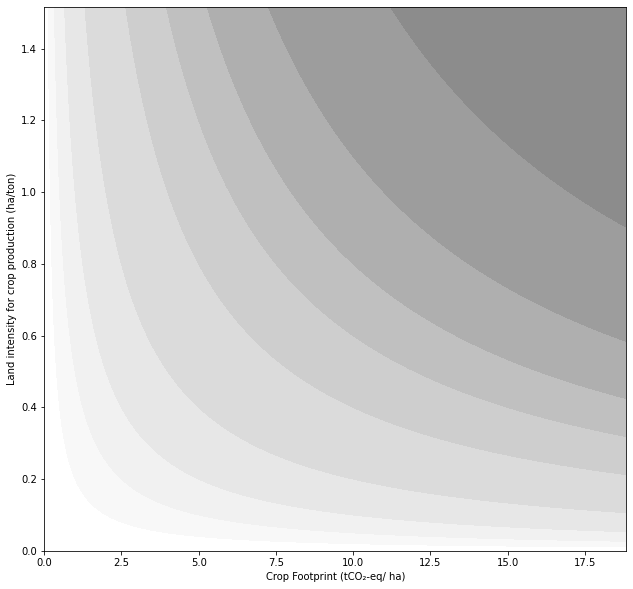

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib import gridspec
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.001, wspace=0.01, width_ratios=[7,0.5,2.5], height_ratios=[5,2,3])


countour_plot = fig.add_subplot(gs[:, :1])

# Assuming carbon_footprint_array and df2_array are defined
crop_footprint = carbon_footprint_array
crop_footprint_selected = carbon_footprint_array_selected

yields = df2_array.flatten()
yields_selected = df2_array_selected.flatten()

land_effeciency = 1 / yields
land_effeciency_selected = 1 / yields_selected

n_points = 100
carbon_footprint_contour = np.linspace(0, np.max(crop_footprint_selected) + 1, n_points)
df2_contour = np.linspace(0, np.max(land_effeciency_selected) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y  # z = total emissions / yield = emissions per hectare

# Plotting the contour
class_ranges = [0.1, 0.2, 0.5, 1, 2, 4, 6, 8, 11, 17, 30, 40]

# Create a sliced colormap
base_cmap = plt.cm.Greys
colors = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors)

# Normalize levels for even distribution
norm = BoundaryNorm(class_ranges, ncolors=custom_cmap.N, clip=True)

contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')

# Add labels and title
countour_plot.set_xlabel('Crop Footprint (tCO₂-eq/ ha)')
countour_plot.set_ylabel('Land intensity for crop production (ha/ton)')
countour_plot.axis('on')

# Scatter plot for selected data points
for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['color'].to_list(), df2_colour['IMAGE Map'].to_list())):
    sizes = df_norm_selected_test[x] * 60
    countour_plot.scatter(crop_footprint_selected[x], land_effeciency_selected[x], color=data[1], edgecolors='grey', label=data[0], s=sizes)
    
    text = countour_plot.text(crop_footprint_selected[x], land_effeciency_selected[x] + 0.02, data[2], fontsize=8, color='black')
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

# Menambahkan legend ke kuadran kanan atas

legend_ax = fig.add_subplot(gs[0, 2])
legend_ax.axis('off')  # Sembunyikan sumbu
colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', 
           '#FFC55A', '#8E3E63', '#D2649A', '#03AED2', 
           '#68D2E8', '#5F6F52', '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566']
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='grey',markersize=10) for color in colors]
columns2 = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
             'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
             'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
            'wheat']
legend_ax.legend(legend_handles, columns2, loc='lower left', bbox_to_anchor=(-0.10,0.1), ncol=1)

size_ax = fig.add_subplot(gs[1,2]) 
size_labels = ['5 Mton', ' 67 Mton','      370 Mton']
size_values = [30, 404.84181766, 2248.3112172]
for size, label in zip(size_values, size_labels):
    size_ax.scatter([], [], s=size, facecolor='white', edgecolor='grey', linewidth=1.5, label=label)  # Empty scatter for legend
size_ax.legend(loc='lower left', bbox_to_anchor=(-0.15,0.5), ncol=3, handletextpad=0, labelspacing=0, frameon=False)
size_ax.axis('off')  # Turn off the axis

ax_barchart = fig.add_subplot(gs[2, 2])
custom_labels = [
    "BRA\nSoybeans",
    "INDO\nPalm Oil",
    "SEA\nRice",
    "WAF\nTropCereals"]

pivot_df.plot(kind='bar', stacked=True, ax=ax_barchart, color=['green', 'blue',], legend=False, width=0.4)

import matplotlib.ticker as ticker
ax_barchart.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax_barchart.set_xticks(range(len(custom_labels)))
ax_barchart.set_xticklabels(custom_labels, rotation=0)
ax_barchart.set_ylabel('(%)', fontsize=10)
ax_barchart.grid(axis='y', linestyle='--', alpha=0.7)
ax_barchart.tick_params(axis='y', labelsize=10)
ax_barchart.set_xlabel("")

bar_legend = ax_barchart.legend( ['MGMT', 'LUC'],
    bbox_to_anchor=(0.5, 1),  # Centered below the plot
    loc='lower center', 
    ncol=2,  # Two columns
    title_fontsize=12,
    fontsize=10
)

plt.tight_layout()
plt.show()

add multiyears

4 study case

In [30]:
palette = {
   'Indonesia region - palm oil - 2020' : "#FC4100",
   'Indonesia region - palm oil - 2015' : "#FC4100",
   'Indonesia region - palm oil - 2010' : "#FC4100",
   'Indonesia region - palm oil - 2005' : "#FC4100",
   'Indonesia region - palm oil - 2000' : "#FC4100",
   'Indonesia region - palm oil - 1995' : "#FC4100",
   'Rest of south asia - rice - 2020' : "#E4E0E1",
   'Rest of south asia - rice - 2015' : "#E4E0E1",
   'Rest of south asia - rice - 2010' : "#E4E0E1",
   'Rest of south asia - rice - 2005' : "#E4E0E1",
   'Rest of south asia - rice - 2000' : "#E4E0E1",
   'Rest of south asia - rice - 1995' : "#E4E0E1",
   'Brazil - soybeans - 2020': "#5F6F52",
   'Brazil - soybeans - 2015': "#5F6F52",
   'Brazil - soybeans - 2010': "#5F6F52",
   'Brazil - soybeans - 2005': "#5F6F52",
   'Brazil - soybeans - 2000': "#5F6F52",
   'Brazil - soybeans - 1995': "#5F6F52",
   'Western africa - tropical cereals - 2020' : "#F7418F",
   'Western africa - tropical cereals - 2015' : "#F7418F",
   'Western africa - tropical cereals - 2010' : "#F7418F",
   'Western africa - tropical cereals - 2005' : "#F7418F",
   'Western africa - tropical cereals - 2000' : "#F7418F",
   'Western africa - tropical cereals - 1995' : "#F7418F",
   }
df_multiyears = pd.DataFrame(palette.items(), columns=["IMAGE Classification Region", "colors"])
df_multiyears['IMAGE Classification Region'] = df_multiyears['IMAGE Classification Region'].str.lower()
df_multiyears['IMAGE Classification Region'] = df_multiyears['IMAGE Classification Region'].str.replace(' - ', '-')

sumbu y

In [31]:
yield_raw_multiyears = yield_raw_1.copy()
yield_raw_multiyears['IMAGE Classification Region'] = yield_raw_multiyears['IMAGE Region Name'] + "-" + yield_raw_multiyears['NGFBFC']
yield_raw_multiyears.rename(columns={'time': 'Year'}, inplace=True)
yield_raw_multiyears = yield_raw_multiyears.drop(columns=['IMAGE Region Name', 'NGFBFC'])
yield_raw_multiyears['value'] = yield_raw_multiyears['value'].fillna(0.0)
yield_FAO_multiyears = yield_raw_multiyears[['Year', 'IMAGE Classification Region', 'value']]
yield_FAO_multiyears['region type years'] = yield_FAO_multiyears['IMAGE Classification Region'] + "-" + yield_FAO_multiyears['Year'].astype(str)
yield_FAO_multiyears = yield_FAO_multiyears[['region type years', 'value']]
yield_FAO_multiyears  = yield_FAO_multiyears[yield_FAO_multiyears['region type years'].isin(df_multiyears['IMAGE Classification Region'])]
yield_FAO_average_array_selected = yield_FAO_multiyears['value'].to_numpy()
yield_FAO_average_array_selected #df2_array_selected

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_12000\1957529828.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_FAO_multiyears['region type years'] = yield_FAO_multiyears['IMAGE Classification Region'] + "-" + yield_FAO_multiyears['Year'].astype(str)


array([ 2.20714168,  2.48883951,  2.4896816 ,  2.83338975,  3.02896941,
        3.24425652, 17.80308744, 17.46742867, 18.35605823, 17.17971983,
       17.14753399, 17.20238881,  2.6712091 ,  3.18683085,  3.54328167,
        4.01573962,  4.27400731,  4.48497251,  0.75567014,  0.80607182,
        0.91846017,  0.85185274,  0.80609163,  0.84169726])

In [32]:
yield_FAO_multiyears

,region type years,value
87,brazil-soybeans-1995,2.207142
103,brazil-soybeans-2000,2.488840
119,brazil-soybeans-2005,2.489682
135,brazil-soybeans-2010,2.833390
151,brazil-soybeans-2015,3.028969
167,brazil-soybeans-2020,3.244257
1050,indonesia region-palm oil-1995,17.803087
1064,indonesia region-palm oil-2000,17.467429
1078,indonesia region-palm oil-2005,18.356058
1092,indonesia region-palm oil-2010,17.179720


sumbu x

In [33]:
carbon_footprint_1 = pd.read_excel("X:/cadlan/stream_2/Step5/CF_emisitotal_AH_14Jan_years_minus.xlsx") #sama kyk diatas tp multitahun

In [34]:
carbon_footprint = carbon_footprint_1.copy()
carbon_footprint.rename(columns={'NGFBFC': 'type'}, inplace=True)
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()

columns = [x for x in range(1975, 2021, 5)]
carbon_footprint['type'] = carbon_footprint['type'].str.replace("non food, luxury, spices", "other non-food & luxury & spices").replace("oil, palm fruit", "palm oil")
carbon_footprint = carbon_footprint[~carbon_footprint['type'].str.contains("pasture")]
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()
carbon_footprint['region type years'] = carbon_footprint['IMAGE Region Name'] + "-" + carbon_footprint['type'] + "-" + carbon_footprint['time'].astype(str)
carbon_footprint = carbon_footprint.drop(columns=["type", "time", "IMAGE Region Name"])


In [35]:
carbon_footprint_array = carbon_footprint['CF'].to_numpy()
carbon_footprint_sorted = carbon_footprint.sort_values(by='CF', ascending=False)
carbon_footprint_multiyears  = carbon_footprint[carbon_footprint['region type years'].isin(df_multiyears['IMAGE Classification Region'])]
carbon_footprint_multiyears #carbon_footprint_
carbon_footprint_multiyears_sorted = carbon_footprint_multiyears.sort_values(by='region type years')
carbon_footprint_multiyears_sorted

,CF,region type years
1670,14.767389,brazil-soybeans-1995
2086,5.190690,brazil-soybeans-2000
2502,4.196291,brazil-soybeans-2005
2918,0.257554,brazil-soybeans-2010
3334,3.919187,brazil-soybeans-2015
3750,1.066926,brazil-soybeans-2020
1762,4.199819,indonesia region-palm oil-1995
2178,45.695845,indonesia region-palm oil-2000
2594,39.585855,indonesia region-palm oil-2005
3010,34.846321,indonesia region-palm oil-2010


In [36]:
carbon_footprint_multiyears_sorted_array_selected = carbon_footprint_multiyears_sorted['CF'].to_numpy()
carbon_footprint_multiyears_sorted_array_selected #carbon_footprint_sorted_array_selected

array([1.47673894e+01, 5.19069043e+00, 4.19629149e+00, 2.57554069e-01,
       3.91918681e+00, 1.06692561e+00, 4.19981913e+00, 4.56958455e+01,
       3.95858546e+01, 3.48463214e+01, 1.74370627e+01, 1.88222795e+01,
       3.06478409e+00, 3.24074642e+00, 3.29032654e+00, 2.68990597e+00,
       2.85115083e+00, 3.18751109e+00, 2.30686255e+00, 2.39165707e+00,
       2.02983419e+00, 7.24073238e-01, 2.26257222e-02, 2.92759853e+00])

In [37]:
carbon_footprint_colour_multiyear = pd.merge(left=carbon_footprint_multiyears_sorted, right=df_multiyears, left_on="region type years", right_on="IMAGE Classification Region", how="left")
carbon_footprint_colour_multiyear

,CF,region type years,IMAGE Classification Region,colors
0,14.767389,brazil-soybeans-1995,brazil-soybeans-1995,#5F6F52
1,5.190690,brazil-soybeans-2000,brazil-soybeans-2000,#5F6F52
2,4.196291,brazil-soybeans-2005,brazil-soybeans-2005,#5F6F52
3,0.257554,brazil-soybeans-2010,brazil-soybeans-2010,#5F6F52
4,3.919187,brazil-soybeans-2015,brazil-soybeans-2015,#5F6F52
5,1.066926,brazil-soybeans-2020,brazil-soybeans-2020,#5F6F52
6,4.199819,indonesia region-palm oil-1995,indonesia region-palm oil-1995,#FC4100
7,45.695845,indonesia region-palm oil-2000,indonesia region-palm oil-2000,#FC4100
8,39.585855,indonesia region-palm oil-2005,indonesia region-palm oil-2005,#FC4100
9,34.846321,indonesia region-palm oil-2010,indonesia region-palm oil-2010,#FC4100


In [38]:
base_list = ['95','00', '05', '10', '15', '20']
num_rows = len(carbon_footprint_colour_multiyear)
num_repeats = num_rows // len(base_list)
multi = base_list * num_repeats
carbon_footprint_colour_multiyear['year'] = multi
carbon_footprint_colour_multiyear

,CF,region type years,IMAGE Classification Region,colors,year
0,14.767389,brazil-soybeans-1995,brazil-soybeans-1995,#5F6F52,95
1,5.190690,brazil-soybeans-2000,brazil-soybeans-2000,#5F6F52,00
2,4.196291,brazil-soybeans-2005,brazil-soybeans-2005,#5F6F52,05
3,0.257554,brazil-soybeans-2010,brazil-soybeans-2010,#5F6F52,10
4,3.919187,brazil-soybeans-2015,brazil-soybeans-2015,#5F6F52,15
5,1.066926,brazil-soybeans-2020,brazil-soybeans-2020,#5F6F52,20
6,4.199819,indonesia region-palm oil-1995,indonesia region-palm oil-1995,#FC4100,95
7,45.695845,indonesia region-palm oil-2000,indonesia region-palm oil-2000,#FC4100,00
8,39.585855,indonesia region-palm oil-2005,indonesia region-palm oil-2005,#FC4100,05
9,34.846321,indonesia region-palm oil-2010,indonesia region-palm oil-2010,#FC4100,10


size

In [39]:
production_copy_multiyears = production_raw.copy()
production_copy_multiyears['region type years'] = production_copy_multiyears ['IMAGE Classification Region'] + "-" + production_copy_multiyears['time'].astype(str)
production_copy_multiyears = production_copy_multiyears.drop(columns=['IMAGE Classification Region', 'time'])
df_norm_multiyears = production_copy_multiyears.copy()
df_norm_multiyears_selected = df_norm_multiyears[df_norm_multiyears['region type years'].isin(df_multiyears['IMAGE Classification Region'])]
df_norm_multiyears_selected

,FAO Production,region type years
87,2.455299e+07,brazil-soybeans-1995
103,3.502612e+07,brazil-soybeans-2000
119,5.259465e+07,brazil-soybeans-2005
135,6.531983e+07,brazil-soybeans-2010
151,9.541537e+07,brazil-soybeans-2015
167,1.219101e+08,brazil-soybeans-2020
1050,2.317198e+07,indonesia region-palm oil-1995
1064,3.844260e+07,indonesia region-palm oil-2000
1078,7.035510e+07,indonesia region-palm oil-2005
1092,1.304316e+08,indonesia region-palm oil-2010


In [40]:
df_norm_multiyears_selected_test = df_norm_multiyears_selected['FAO Production'].to_numpy()/1e7
df_norm_multiyears_selected_test #df_norm_selected_test

array([ 2.45529914,  3.50261238,  5.25946528,  6.53198266,  9.54153708,
       12.19100876,  2.31719752,  3.84426   ,  7.03551   , 13.04316387,
       19.83094849, 25.47441482,  3.93522642,  4.92800267,  5.54240792,
        6.74862962,  7.20260507,  7.79593153,  2.0872016 ,  2.33997884,
        2.84905315,  2.66800165,  2.50143154,  2.67257084])

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_12000\3110394910.py:29: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')


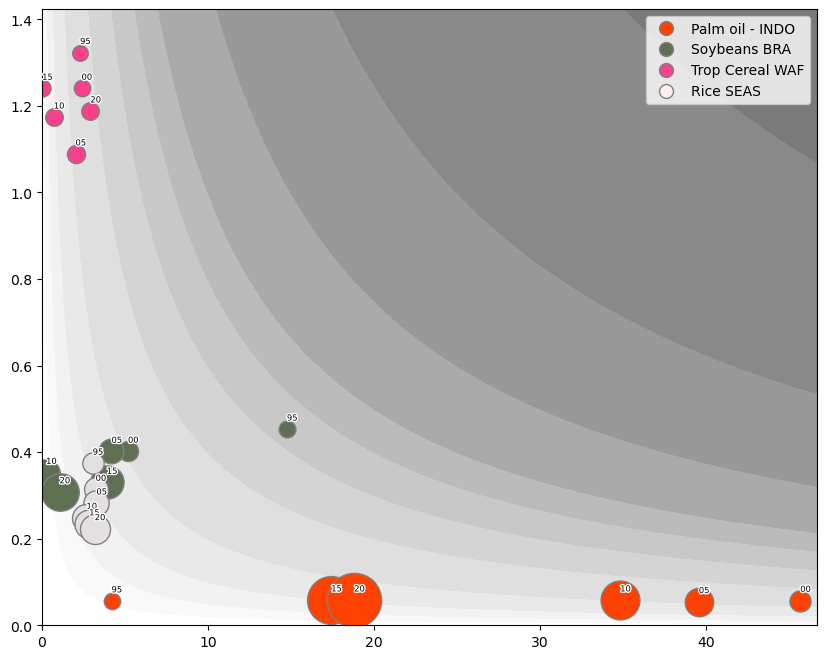

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects

plt.figure(figsize=(10, 8))

crop_footprint_selected_multiyear = carbon_footprint_multiyears_sorted_array_selected
yields_selected_mulityears = yield_FAO_average_array_selected.flatten()
land_effeciency_selected_multiyears = 1 / yields_selected_mulityears

n_points = 100
carbon_footprint_contour_multiyear = np.linspace(0, np.max(crop_footprint_selected_multiyear) + 1, n_points)
df2_contour_multiyear = np.linspace(0, np.max(land_effeciency_selected_multiyears) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour_multiyear, df2_contour_multiyear)
Z = X * Y  # z = total emissions / yield = emissions per hectare

# Plot
class_ranges_multiyear = [0.1, 0.2, 0.5, 1, 2, 4, 6, 8, 10, 15, 25, 50, 70]

# Create a sliced colormap
base_cmap = plt.cm.Greys
colors_multiyear = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors_multiyear)

# Normalize levels for even distribution
norm_multiyear = BoundaryNorm(class_ranges_multiyear, ncolors=custom_cmap.N, clip=True)
contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')

for x, data in enumerate(zip(carbon_footprint_colour_multiyear['region type years'].to_list(), carbon_footprint_colour_multiyear['colors'].to_list(), carbon_footprint_colour_multiyear['year'])):
    sizes_multiyear = df_norm_multiyears_selected_test[x] * 60
    plt.scatter(crop_footprint_selected_multiyear[x], land_effeciency_selected_multiyears[x], color=data[1], edgecolors='grey', label=data[0], s=sizes_multiyear)
    text_multiyear = plt.text(crop_footprint_selected_multiyear[x], land_effeciency_selected_multiyears[x] + 0.02, data[2], fontsize=6, color='black') 
    text_multiyear.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

from matplotlib.lines import Line2D
color2 = ['#FC4100', '#5F6F52', '#F7418F', '#FFEFEF']
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_item, markersize=10, linestyle='',  markeredgecolor='grey') for color_item in color2]
columns2 = ['Palm oil - INDO','Soybeans BRA', 'Trop Cereal WAF', 'Rice SEAS']
plt.legend(legend_handles, columns2, loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
# plt.xlabel('Crop Footprint (tCO₂-eq/ ha)')
# plt.ylabel('Land intensity for crop production (ha/ton)')
plt.show()

COMBINED

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_12000\3970856614.py:21: RuntimeWarning: divide by zero encountered in divide
  land_effeciency = 1 / yields
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_12000\3970856614.py:43: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_12000\3970856614.py:113: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_12000\3970856614.py:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


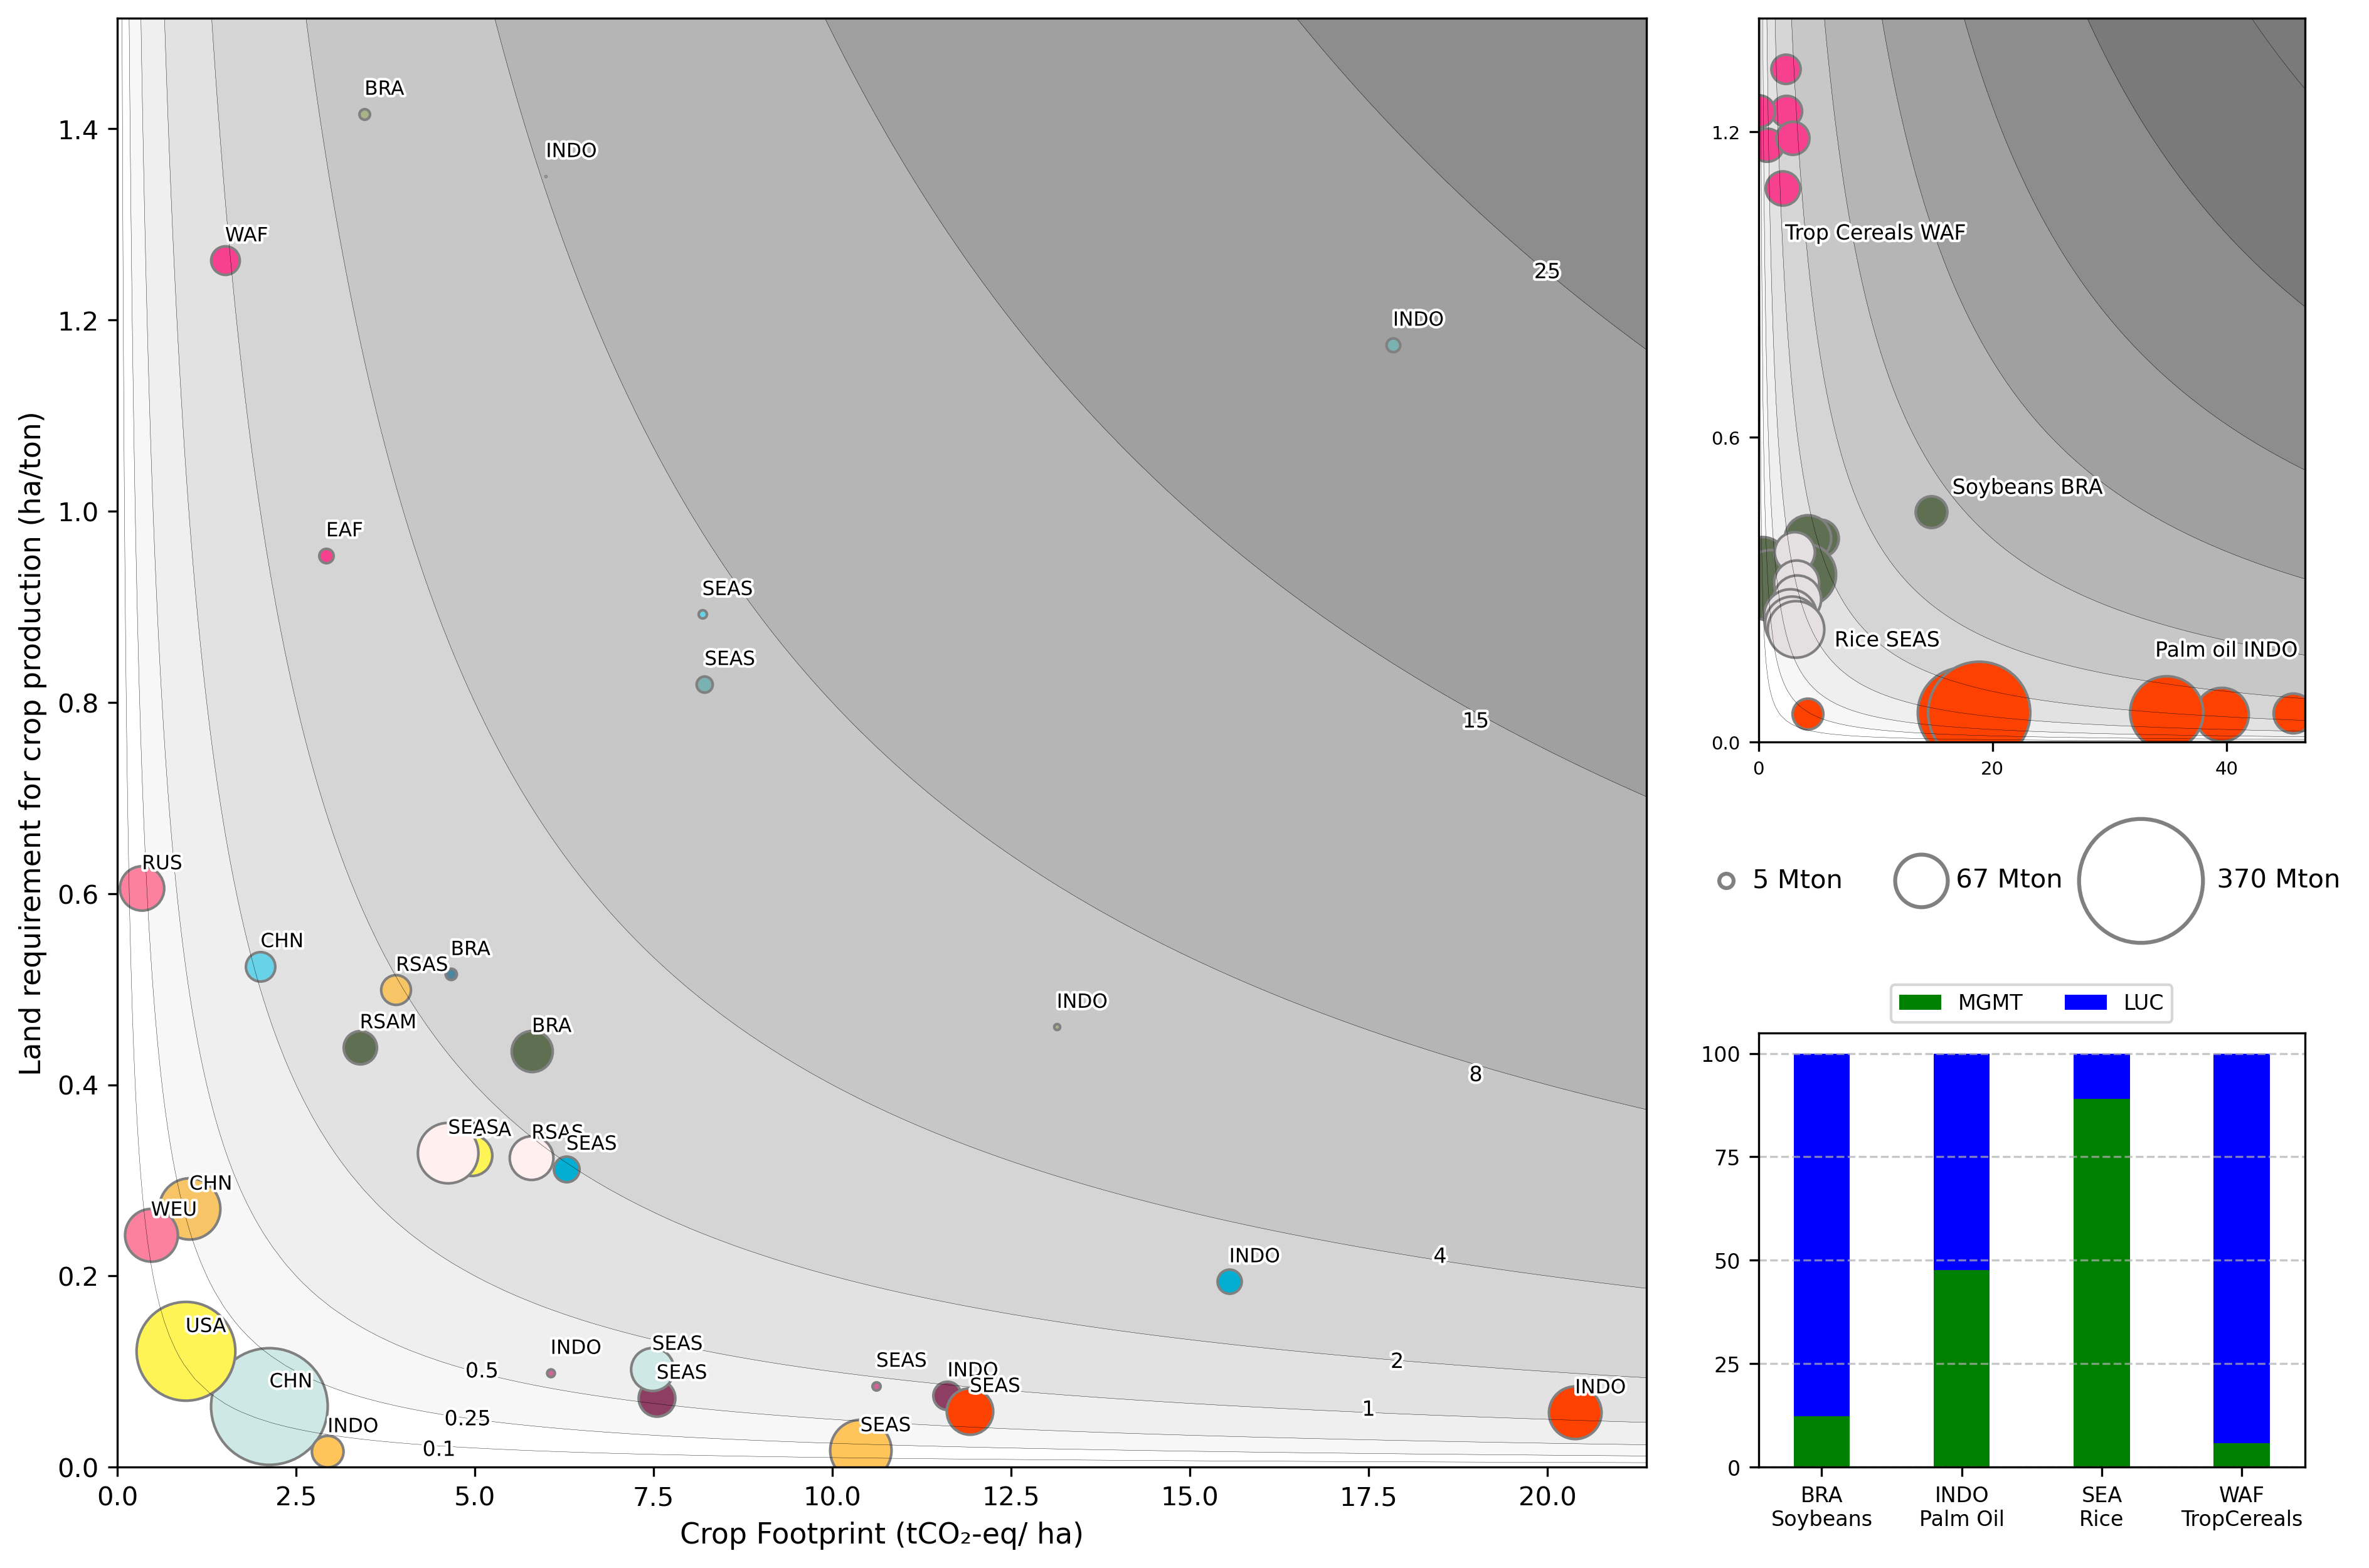

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib import gridspec
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(15, 10), dpi=300)
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.001, wspace=0.002, width_ratios=[7,0.5,2.5], height_ratios=[5,2,3])


countour_plot = fig.add_subplot(gs[:, :1])

# Assuming carbon_footprint_array and df2_array are defined
crop_footprint = carbon_footprint_array
crop_footprint_selected = carbon_footprint_array_selected

yields = df2_array.flatten()
yields_selected = df2_array_selected.flatten()

land_effeciency = 1 / yields
land_effeciency_selected = 1 / yields_selected

n_points = 100
carbon_footprint_contour = np.linspace(0, np.max(crop_footprint_selected) + 1, n_points)
df2_contour = np.linspace(0, np.max(land_effeciency_selected) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y  # z = total emissions / yield = emissions per hectare

# Plotting the contour
# class_ranges = [0.1, 0.25, 0.5, 1, 2, 4, 6, 8, 11, 17, 30, 50]
class_ranges = [0.1, 0.25, 0.5, 1, 2, 4, 8, 15, 25, 40, 60]

# Create a sliced colormap
base_cmap = plt.cm.Greys
colors = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors)

# Normalize levels for even distribution
norm = BoundaryNorm(class_ranges, ncolors=custom_cmap.N, clip=True)

contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
# cbar = plt.colorbar(contour, ax=countour_plot)
# cbar.set_label('Emission Intensity (t CO₂-eq/ton)')
contour_lines = countour_plot.contour(X, Y, Z, levels=class_ranges, colors='black', linewidths=0.1)

texts = [
    ("0.1", 4.5, 0.018),
    ("0.25", 4.9, 0.05),
    ("0.5", 5.1, 0.1),
    ("1", 17.5, 0.06),
    ("2", 17.9, 0.11),
    ("4", 18.5, 0.22),
    ("8", 19, 0.41),
    ("15", 19, 0.78),
    ("25", 20, 1.25),
]

from matplotlib import patheffects 
for text, x, y in texts:
    # Create text object
    text_obj = countour_plot.text(x, y, text, fontsize=8, color='black', ha='center', va='center')
    text_obj.set_path_effects([patheffects.withStroke(linewidth=2, foreground="white")])

# Add labels and title
countour_plot.set_xlabel('Crop Footprint (tCO₂-eq/ ha)', fontsize=11)
countour_plot.set_ylabel('Land requirement for crop production (ha/ton)',fontsize=11)
countour_plot.axis('on')

# Scatter plot for selected data points
for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['color'].to_list(), df2_colour['IMAGE Map'].to_list())):
    sizes = df_norm_selected_test[x] * 60
    countour_plot.scatter(crop_footprint_selected[x], land_effeciency_selected[x], color=data[1], edgecolors='grey', label=data[0], s=sizes)
    
    text = countour_plot.text(crop_footprint_selected[x], land_effeciency_selected[x] + 0.02, data[2], fontsize=7.5, color='black')
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

# Menambahkan legend ke kuadran kanan atas

# legend_ax = fig.add_subplot(gs[0, 2])
# legend_ax.axis('off')  # Sembunyikan sumbu
# colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', 
#            '#FFC55A', '#8E3E63', '#D2649A', '#03AED2', 
#            '#68D2E8', '#5F6F52', '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
#           '#F7C566']
# legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='grey',markersize=10) for color in colors]
# columns2 = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
#              'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
#              'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
#             'wheat']
# legend_ax.legend(legend_handles, columns2, loc='lower left', bbox_to_anchor=(-0.10,0.1), ncol=1)


countour_multi = fig.add_subplot(gs[0, 2])
crop_footprint_selected_multiyear = carbon_footprint_multiyears_sorted_array_selected
yields_selected_mulityears = yield_FAO_average_array_selected.flatten()
land_effeciency_selected_multiyears = 1 / yields_selected_mulityears

n_points = 100
carbon_footprint_contour_multiyear = np.linspace(0, np.max(crop_footprint_selected_multiyear) + 1, n_points)
df2_contour_multiyear = np.linspace(0, np.max(land_effeciency_selected_multiyears) + 0.1, n_points)
X, Y = np.meshgrid(carbon_footprint_contour_multiyear, df2_contour_multiyear)
Z = X * Y  # z = total emissions / yield = emissions per hectare
class_ranges_multiyear = [0.1, 0.25, 0.5, 1, 2, 4, 8, 15, 25, 40, 70]

base_cmap = plt.cm.Greys
colors_multiyear = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors_multiyear)

# Normalize levels for even distribution
norm_multiyear = BoundaryNorm(class_ranges_multiyear, ncolors=custom_cmap.N, clip=True)
contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')
contour_lines = countour_multi.contour(X, Y, Z, levels=class_ranges, colors='black', linewidths=0.1)

for x, data in enumerate(zip(carbon_footprint_colour_multiyear['region type years'].to_list(), carbon_footprint_colour_multiyear['colors'].to_list(), carbon_footprint_colour_multiyear['year'])):
    sizes_multiyear = df_norm_multiyears_selected_test[x] * 60
    countour_multi.scatter(crop_footprint_selected_multiyear[x], land_effeciency_selected_multiyears[x], color=data[1], edgecolors='grey', label=data[0], s=sizes_multiyear)
    # text_multiyear = plt.text(crop_footprint_selected_multiyear[x], land_effeciency_selected_multiyears[x] + 0.02, data[2], fontsize=6, color='black') 
    # text_multiyear.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])
# countour_multi.axis('on')

y_tick_interval = 0.6  # Change this to your desired interval
y_ticks = np.arange(0, np.max(land_effeciency_selected_multiyears), y_tick_interval)
countour_multi.set_yticks(y_ticks)

x_tick_interval = 20  # Change this to your desired interval
x_ticks = np.arange(0, np.max(crop_footprint_selected_multiyear), x_tick_interval)
countour_multi.set_xticks(x_ticks)

countour_multi.tick_params(axis='x', labelsize=7) 
countour_multi.tick_params(axis='y', labelsize=7) 

texts = [
    ("Palm oil INDO", 40, 0.18),
    ("Soybeans BRA", 23, 0.5),
    ("Rice SEAS", 11, 0.2),
    ("Trop Cereals WAF", 10, 1)
]

from matplotlib import patheffects 
for text, x, y in texts:
    # Create text object
    text_obj = countour_multi.text(x, y, text, fontsize=8, color='black', ha='center', va='center')
    text_obj.set_path_effects([patheffects.withStroke(linewidth=2, foreground="white")])


# from matplotlib.lines import Line2D
# color2 = ['#FC4100', '#5F6F52', '#F7418F', '#FFEFEF']
# legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_item, markersize=10, linestyle='',  markeredgecolor='grey') for color_item in color2]
# columns2 = ['Palm oil - INDO','Soybeans BRA', 'Trop Cereal WAF', 'Rice SEAS']
# plt.legend(legend_handles, columns2, loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
# plt.xlabel('Crop Footprint (tCO₂-eq/ ha)')
# plt.ylabel('Land intensity for crop production (ha/ton)')


#kuadran tengah kanan
size_ax = fig.add_subplot(gs[1,2]) 
size_labels = ['5 Mton', ' 67 Mton','      370 Mton']
size_values = [30, 404.84181766, 2248.3112172]
for size, label in zip(size_values, size_labels):
    size_ax.scatter([], [], s=size, facecolor='white', edgecolor='grey', linewidth=1.5, label=label)  # Empty scatter for legend
size_ax.legend(loc='lower left', bbox_to_anchor=(-0.15,0.4), ncol=3, handletextpad=0, labelspacing=0, frameon=False)
size_ax.axis('off')  # Turn off the axis

#kuadran tengah bawah
ax_barchart = fig.add_subplot(gs[2, 2])
custom_labels = [
    "BRA\nSoybeans",
    "INDO\nPalm Oil",
    "SEA\nRice",
    "WAF\nTropCereals"]

pivot_df.plot(kind='bar', stacked=True, ax=ax_barchart, color=['green', 'blue'], legend=False, width=0.4)

import matplotlib.ticker as ticker
ax_barchart.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax_barchart.set_xticks(range(len(custom_labels)))
ax_barchart.set_xticklabels(custom_labels, rotation=0, fontsize=8)
# ax_barchart.set_ylabel('(%)', fontsize=8)
ax_barchart.grid(axis='y', linestyle='--', alpha=0.7)
ax_barchart.tick_params(axis='y', labelsize=8)
ax_barchart.set_xlabel("")

bar_legend = ax_barchart.legend( ['MGMT', 'LUC'],
    bbox_to_anchor=(0.5, 1),  # Centered below the plot
    loc='lower center', 
    ncol=2,  # Two columns
    title_fontsize=10,
    fontsize=8
)

plt.tight_layout()
plt.show()